Note: you may need to restart the kernel to use updated packages.
(16365, 2)
<bound method NDFrame.head of             Date        Close
0     1957-03-04   626.725613
1     1957-03-05   626.720007
2     1957-03-06   626.564401
3     1957-03-07   626.378795
4     1957-03-08   626.073189
...          ...          ...
16360 2022-02-28  2247.290173
16361 2022-03-01  2179.444567
16362 2022-03-02  2259.558961
16363 2022-03-03  2236.343355
16364 2022-03-04  2201.557748

[16365 rows x 2 columns]>
(16365, 2)


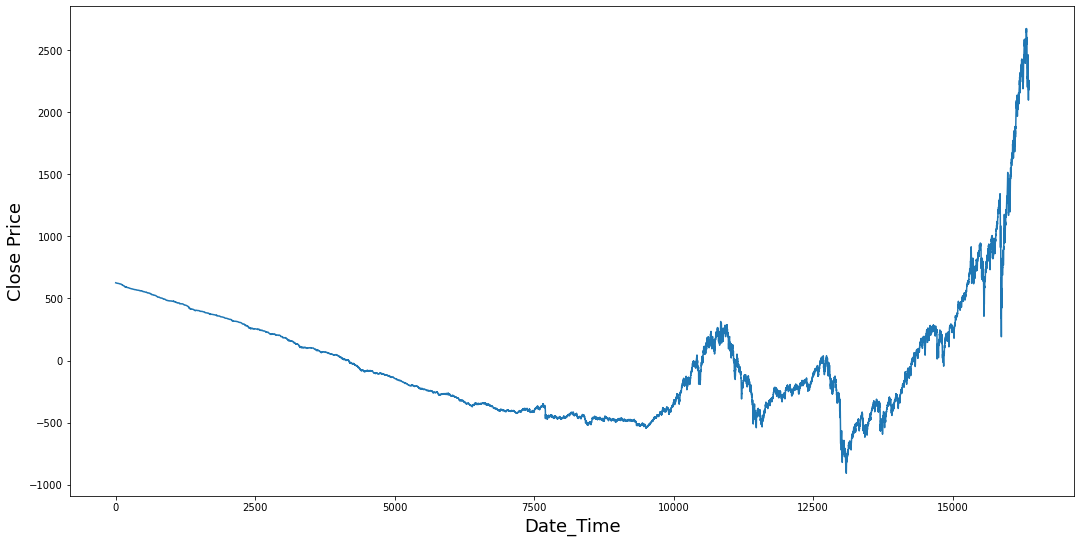

train shape (5565,)
valid shape (5400,)
test shape (5400,)
(5565, 1)
(5400, 1)
(5400, 1)


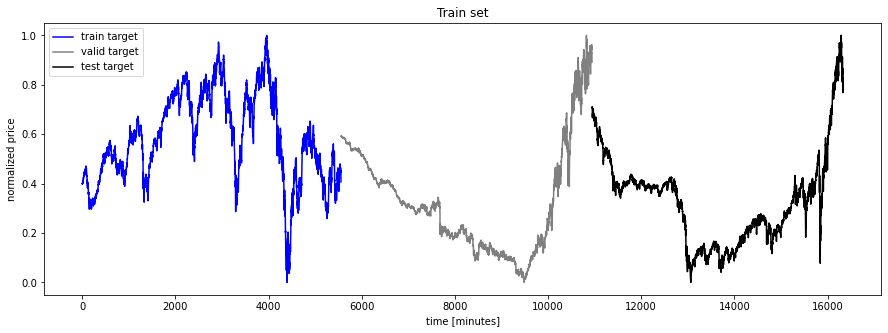

2022-05-01 00:47:22.076056: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


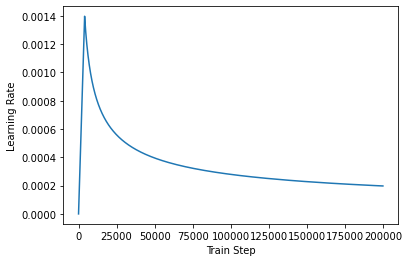

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 1)]      0           []                               
                                                                                                  
 bidirectional (Bidirectional)  (None, 10, 256)      133120      ['input_1[0][0]']                
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 10, 128)     164352      ['bidirectional[0][0]']          
 )                                                                                                
                                                                                                  
 dense (Dense)                  (None, 10, 256)      32768       ['bidirectional_1[0][0]']    

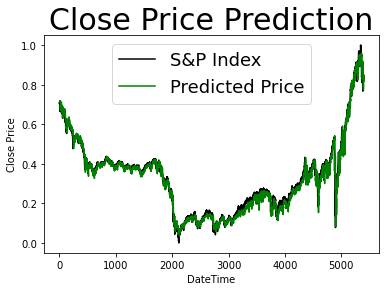

0.00022734330563240924


In [ ]:
%run Prediction_032322.ipynb

In [ ]:
# Import necessary python Libraries
import os
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import SCORERS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.calibration import CalibratedClassifierCV

from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier

from sklearn.base import BaseEstimator, RegressorMixin

from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
multi_head.fit(np.squeeze(X_train), np.squeeze(y_train))

174/174 [==============================] - 14s 54ms/step - loss: 2.0564e-04


In [ ]:
model_svr = SVR(kernel = 'rbf')
model_svr.fit(np.squeeze(X_train), np.squeeze(y_train))

SVR()

In [ ]:
y_pred_svr = model_svr.predict(np.squeeze(X_test))

In [ ]:
print(y_pred_svr)

[0.67881538 0.67829902 0.67718107 ... 0.75993594 0.76143269 0.76280019]


In [ ]:
score_svr = model_svr.score(np.squeeze(X_test),np.squeeze(y_test))
print("R-squared:", score_svr)
mse_svr = mean_squared_error(np.squeeze(y_test), y_pred_svr)
print("MSE:",mse_svr)

R-squared: 0.9769892816168472
MSE: 0.0007959239245743006


In [ ]:
svr_model = pickle.dumps(model_svr)

In [ ]:
model_dtr = DecisionTreeRegressor(random_state=1)
model_dtr.fit(np.squeeze(X_train), np.squeeze(y_train))

DecisionTreeRegressor(random_state=1)

In [ ]:
y_pred_dtr = model_dtr.predict(np.squeeze(X_test))

In [ ]:
print(y_pred_dtr)

[0.71509141 0.69953455 0.70191195 ... 0.77722668 0.85250208 0.82106379]


In [ ]:
score_dtr = model_dtr.score(np.squeeze(X_test),np.squeeze(y_test))
print("R-squared:", score_dtr)
mse_dtr = mean_squared_error(np.squeeze(y_test), y_pred_dtr)
print("MSE:", mse_dtr )


R-squared: 0.9917209564133802
MSE: 0.0002863660644340688


In [ ]:
dtr_model = pickle.dumps(model_dtr)

In [ ]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [ ]:
model_gbr = GradientBoostingRegressor(random_state=1)


In [ ]:
model_gbr.fit(np.squeeze(X_train), np.squeeze(y_train))

GradientBoostingRegressor(random_state=1)

In [ ]:
y_pred_gbr = model_gbr.predict(np.squeeze(X_test))
print(y_pred_gbr)

[0.71005273 0.71005273 0.70665568 ... 0.80048757 0.82968456 0.82044333]


In [ ]:
score_gbr = model_gbr.score(np.squeeze(X_test),np.squeeze(y_test))
print("R-squared:", score_gbr)
mse_gbr = mean_squared_error(np.squeeze(y_test), y_pred_gbr)
print("MSE:", mse_gbr)

R-squared: 0.9970976516325487
MSE: 0.00010039010797659176


In [ ]:
gbr_model = pickle.dumps(model_gbr)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 50, return_sequences = True))
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 50, return_sequences = True))
model_lstm.add(Dropout(0.2))

model_lstm.add(LSTM(units = 50))
model_lstm.add(Dropout(0.2))

model_lstm.add(Dense(units = 1))

model_lstm.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
callback_lstm = EarlyStopping(patience = 20, min_delta = 0.0001)

In [ ]:
model_lstm.fit(x=np.squeeze(X_train), y=np.squeeze(y_train), batch_size=BATCH_SIZE,
                         epochs=EPOCHS,
                         validation_data=(X_valid, y_valid)
                         , callbacks=[callback_lstm])

Epoch 1/200
174/174 [==============================] - 12s 33ms/step - loss: 0.0185 - val_loss: 0.0011
Epoch 2/200
174/174 [==============================] - 5s 26ms/step - loss: 0.0039 - val_loss: 7.2890e-04
Epoch 3/200
174/174 [==============================] - 5s 27ms/step - loss: 0.0037 - val_loss: 4.3267e-04
Epoch 4/200
174/174 [==============================] - 5s 28ms/step - loss: 0.0031 - val_loss: 5.2603e-04
Epoch 5/200
174/174 [==============================] - 5s 28ms/step - loss: 0.0032 - val_loss: 6.5617e-04
Epoch 6/200
174/174 [==============================] - 5s 28ms/step - loss: 0.0028 - val_loss: 3.2942e-04
Epoch 7/200
174/174 [==============================] - 5s 29ms/step - loss: 0.0027 - val_loss: 4.9287e-04
Epoch 8/200
174/174 [==============================] - 5s 31ms/step - loss: 0.0025 - val_loss: 4.1151e-04
Epoch 9/200
174/174 [==============================] - 5s 29ms/step - loss: 0.0025 - val_loss: 3.3309e-04
Epoch 10/200
174/174 [===========================

In [ ]:
y_pred_lstm = model_lstm.predict(np.squeeze(X_test))

In [ ]:
mse_lstm = mean_squared_error(np.squeeze(y_test), y_pred_lstm)
print("MSE:",mse_lstm)


MSE: 0.00024796191929640305


In [ ]:
mse_reg=[]
for reg, label in zip([y_pred_svr, y_pred_dtr, y_pred_gbr, y_pred_lstm, predicted_stock_price_multi_head], ['SVR', 'Decision tree', 'Gboost', 'LSTM', 'Transformer']):
  mse_reg.append(mean_squared_error(np.squeeze(y_test), reg))
print("MSE:", mse_reg)

MSE: [0.0007959239245743006, 0.0002863660644340688, 0.00010039010797659176, 0.00024796191929640305, 0.00022734330563240924]


In [ ]:
mean_reg=[]
for i in np.arange(0,len(y_test), dtype=int):
  mean_reg.append((y_pred_svr[i] + y_pred_dtr[i] + y_pred_gbr[i] + y_pred_lstm[i] + predicted_stock_price_multi_head[i])/5)

In [ ]:
mse_mean_reg = mean_squared_error(np.squeeze(y_test), mean_reg)
print(mse_mean_reg)

0.0001320179833442711


In [ ]:
stacked_pred_t = np.array([np.squeeze(y_pred_svr), np.squeeze(y_pred_dtr), np.squeeze(y_pred_gbr), np.squeeze(y_pred_lstm), np.squeeze(predicted_stock_price_multi_head)])

In [ ]:
stacked_pred = np.transpose(stacked_pred_t)
print(stacked_pred.shape)

(5390, 5)


In [ ]:
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from tensorflow import keras

In [ ]:
stacked_model_lr = LinearRegression()

In [ ]:
min_length = min(len(stacked_pred), len(y_train))
print(min_length)

5390


In [ ]:
stacked_model_lr.fit(stacked_pred[:(min_length-1)], y_train[:(min_length-1)])

LinearRegression()

In [ ]:
print(stacked_model_lr.coef_)

[[-1.69808481 -0.22364391  0.8474065   0.63069764 -0.34815858]]


In [ ]:
y_pred_stacked_lr = np.matmul(stacked_pred, np.transpose(stacked_model_lr.coef_))

In [ ]:
min_length1 = min(len(y_test), len(y_pred_stacked_lr))
print(min_length1)

5390


In [ ]:
mse_pred_stacked_lr = mean_squared_error(np.squeeze(y_test[0:(min_length1-1),]), y_pred_stacked_lr[0:(min_length1-1)])

In [ ]:
print(mse_pred_stacked_lr)

0.46552912388847295


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_rf = RandomForestRegressor(random_state=3)

In [ ]:
model_rf.fit(np.squeeze(X_train), np.squeeze(y_train))

RandomForestRegressor(random_state=3)

In [ ]:
y_pred_rf = model_rf.predict(np.squeeze(X_test))

In [ ]:
mse_rf = mean_squared_error(np.squeeze(y_test), y_pred_rf)
print("MSE:",mse_rf)

MSE: 0.00010780468251449776


In [ ]:
rf_model = pickle.dumps(model_rf)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model_ab = AdaBoostRegressor(random_state=1)

In [ ]:
model_ab.fit(np.squeeze(X_train), np.squeeze(y_train))

AdaBoostRegressor(random_state=1)

In [ ]:
y_pred_ab = model_ab.predict(np.squeeze(X_test))

In [ ]:
mse_ab = mean_squared_error(np.squeeze(y_test), y_pred_ab)
print("MSE:",mse_ab)

MSE: 0.00014760667191550134


In [ ]:
ab_model = pickle.dumps(model_ab)

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(np.squeeze(X_train), np.squeeze(y_train))
y_pred_xgb = model_xgb.predict(np.squeeze(X_test))
mse_xgb = mean_squared_error(np.squeeze(y_test), y_pred_xgb)
print("MSE:",mse_xgb)

MSE: 0.00014429412322050552


In [ ]:
xgb_model = pickle.dumps(model_xgb)

In [ ]:
pip install lightgbm


Solving environment: done

## Package Plan ##

  environment location: /Users/welcomebaby/opt/anaconda3

  added / updated specs:
    - lightgbm


The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    pkgs/main::ca-certificates-2022.3.29-~ --> conda-forge::ca-certificates-2021.10.8-h033912b_0
  certifi            pkgs/main::certifi-2021.10.8-py39hecd~ --> conda-forge::certifi-2021.10.8-py39h6e9494a_2
  conda              pkgs/main::conda-4.12.0-py39hecd8cb5_0 --> conda-forge::conda-4.12.0-py39h6e9494a_0
  openssl              pkgs/main::openssl-1.1.1n-hca72f7f_0 --> conda-forge::openssl-1.1.1n-h6c3fc93_0


Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import lightgbm
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor()
model_lgbm.fit(np.squeeze(X_train), np.squeeze(y_train))
y_pred_lgbm = model_lgbm.predict(np.squeeze(X_test))
mse_lgbm = mean_squared_error(np.squeeze(y_test), y_pred_lgbm)
print("MSE:",mse_lgbm)

MSE: 0.00020199489438879004


In [ ]:
lgbm_model = pickle.dumps(model_lgbm)

In [ ]:
# Stacked model
base_model = [model_svr, model_dtr, model_gbr, model_lstm, multi_head, model_rf, model_xgb, model_lgbm]

In [ ]:
y_pred_lstm_array = np.array(y_pred_lstm)
y_pred_multi_head_array = np.array(predicted_stock_price_multi_head)

In [ ]:
y_pred_lstm_sq = np.squeeze(y_pred_lstm_array)
y_pred_multi_head_sq = np.squeeze(y_pred_multi_head_array)
print(y_pred_lstm_sq.shape)
print(y_pred_multi_head_sq.shape)

(5390,)
(5390,)


In [ ]:
base_predict = [y_pred_svr, y_pred_dtr, y_pred_gbr, y_pred_lstm_sq, y_pred_multi_head_sq, y_pred_rf, y_pred_xgb, y_pred_lgbm]

In [ ]:
print(len(base_predict))

8


In [ ]:
print(y_pred_svr.shape, y_pred_dtr.shape, y_pred_gbr.shape, y_pred_lstm_sq.shape, y_pred_multi_head_sq.shape, y_pred_rf.shape, y_pred_xgb.shape, y_pred_lgbm.shape)

(5390,) (5390,) (5390,) (5390,) (5390,) (5390,) (5390,) (5390,)


In [ ]:
base_predict_array = np.array(base_predict)

In [ ]:
print(y_test.shape)

(5390, 1)


In [ ]:
inputX = np.squeeze(X_train)
inputy = np.squeeze(y_train[:y_test.shape[0]])
testX = np.squeeze(X_test)
testy = np.squeeze(y_test[:y_test.shape[0]])

In [ ]:
print(inputy.shape)
print(testy.shape)
print(testX.shape)

(5390,)
(5390,)
(5390, 10)


In [ ]:
base_predict_t = np.transpose(base_predict)
print(base_predict_t.shape)

(5390, 8)


In [ ]:
meta = LinearRegression()
meta.fit(base_predict_t, inputy)

LinearRegression()

In [ ]:
y_pred_meta = meta.predict(testX[:, 0:base_predict_t.shape[1]])

In [ ]:
print(y_pred_meta.shape)

(5390,)


In [ ]:
# evaluate model on test set
mse_meta = mean_squared_error(testy, y_pred_meta)
print("MSE:",mse_meta)

MSE: 0.18033222854182854


In [ ]:
# mse for stacked ensemble

In [ ]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [ ]:
# Create LSTM Model
def create_model():
    model = Sequential() 
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1))) 
    model.add(Dropout(0.2)) 
    model.add(LSTM(units = 50, return_sequences = True)) 
    model.add(Dropout(0.2)) 
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2)) 
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

model_lstm1 = KerasRegressor(build_fn=create_model, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
model_lstm1._estimator_type = "regressor"

In [ ]:
# Create Transformer model
model_transformer = KerasRegressor(build_fn=build_model, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
model_transformer._estimator_type = "regressor"

In [ ]:
# define the base models

level0 = list()        # # list() 

level0.append(('svr', SVR()))
level0.append(('dtr', DecisionTreeRegressor()))
level0.append(('gbr', GradientBoostingRegressor(random_state=1)))
level0.append(('rf', RandomForestRegressor(random_state=1)))
level0.append(('ab', AdaBoostRegressor(random_state=1)))
level0.append(('xgb', XGBRegressor()))
level0.append(('lgbm', LGBMRegressor()))

# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
model_sr = StackingRegressor(estimators=level0, final_estimator=level1)
# fit the model on all available data
model_sr.fit(np.squeeze(X_train), np.squeeze(y_train))

StackingRegressor(estimators=[('svr', SVR()), ('dtr', DecisionTreeRegressor()),
                              ('gbr',
                               GradientBoostingRegressor(random_state=1)),
                              ('rf', RandomForestRegressor(random_state=1)),
                              ('ab', AdaBoostRegressor(random_state=1)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=Fal...
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                        

In [ ]:
# Defining Callbacks for early stopping
callback = EarlyStopping(patience = 20, min_delta = 0.0001)

In [ ]:
scores_svr = cross_val_score(SVR(), np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

scores_dtr = cross_val_score(DecisionTreeRegressor(random_state=1), np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

scores_gbr = cross_val_score(GradientBoostingRegressor(random_state=1), np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

scores_rf = cross_val_score(RandomForestRegressor(random_state=1), np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

scores_ab = cross_val_score(AdaBoostRegressor(random_state=1), np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

scores_xgb = cross_val_score(XGBRegressor(), np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

scores_lgbm = cross_val_score(LGBMRegressor(), np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

scores_stacked = cross_val_score(model_sr, np.squeeze(X_train), np.squeeze(y_train), scoring='neg_mean_squared_error', cv=2)

print(scores_svr)
print(scores_dtr)
print(scores_gbr)
print(scores_rf)
print(scores_ab)
print(scores_xgb)
print(scores_lgbm)
print(scores_stacked)

[-0.00073835 -0.0141122 ]
[-0.00017499 -0.00228435]
[-5.86981053e-05 -2.37626121e-03]
[-6.54272175e-05 -2.19190910e-03]
[-0.00010104 -0.00307339]
[-7.22291274e-05 -2.25850859e-03]
[-6.42612652e-05 -2.21553943e-03]
[-6.37838480e-05 -2.07934115e-03]


In [ ]:
stacked_model = pickle.dumps(stacked_sr)